In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# ==========================================
# 1. GENERACIÓN DE DATOS SINTÉTICOS (CDMX)
# ==========================================
np.random.seed(42) # Para que los resultados sean reproducibles

alcaldias = [
    'Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 
    'Cuajimalpa', 'Cuauhtémoc', 'Gustavo A. Madero', 'Iztacalco', 
    'Iztapalapa', 'Magdalena Contreras', 'Miguel Hidalgo', 'Milpa Alta', 
    'Tláhuac', 'Tlalpan', 'Venustiano Carranza', 'Xochimilco'
]

# Variables Independientes (X)
data = {
    'Alcaldia': alcaldias,
    'Lluvia_mm': np.random.randint(600, 1200, 16), # Precipitación anual
    'TDPA': np.random.randint(5000, 50000, 16),    # Tráfico Diario Promedio Anual
    'Temperatura_Prom': np.random.uniform(14, 25, 16), # Calor (afecta viscosidad)
    'Presupuesto_Programado_M': np.random.randint(50, 200, 16), # Millones MXN
    'Presupuesto_Ejercido_M': np.random.randint(40, 190, 16)    # Millones MXN
}

df = pd.DataFrame(data)

# Variable Dependiente (y) - Baches Reales (Simulados con una fórmula lógica)
# Fórmula oculta: Baches = 5*Lluvia + 0.2*TDPA + Ruido Aleatorio
df['Baches_Reportados'] = (
    (df['Lluvia_mm'] * 5) + 
    (df['TDPA'] * 0.15) + 
    (df['Temperatura_Prom'] * 100) + 
    np.random.randint(-500, 500, 16)
).astype(int)

# ==========================================
# 2. MACHINE LEARNING: ENTRENAMIENTO
# ==========================================
# Definimos las variables predictoras
X = df[['Lluvia_mm', 'TDPA', 'Temperatura_Prom']]
y = df['Baches_Reportados']

# Creamos el modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes: ¿Qué tanto pesa cada variable según el modelo?
impacto_lluvia = modelo.coef_[0] # Cuántos baches genera 1 mm de lluvia extra
print(f"--- DIAGNÓSTICO DEL MODELO ---")
print(f"Por cada 1mm de lluvia extra, se generan {impacto_lluvia:.2f} baches adicionales (con asfalto tradicional).")

# ==========================================
# 3. ESCENARIOS: PLAN A vs PLAN B (PAFLEC)
# ==========================================

# PLAN A: Predicción estándar para el próximo año (Asumiendo mismas condiciones)
df['Prediccion_Plan_A'] = modelo.predict(X).astype(int)

# PLAN B: Implementación de PAFLEC
# Hipótesis de Ingeniería: PAFLEC reduce el impacto del agua en un 60%
# Matemáticamente: Reducimos el coeficiente de la variable 'Lluvia' en la ecuación
factor_mejora_paflec = 0.60 
reduccion_baches_agua = (df['Lluvia_mm'] * impacto_lluvia * factor_mejora_paflec)
df['Prediccion_Plan_B'] = (df['Prediccion_Plan_A'] - reduccion_baches_agua).astype(int)

# ==========================================
# 4. ANÁLISIS FINANCIERO (Retrabajo vs Tecnología)
# ==========================================
# Costos Unitarios Hipotéticos (MXN)
costo_bacheo_tradicional = 1500 # Barato al inicio
costo_bacheo_paflec = 2200      # Más caro el material (tecnología)
tasa_retrabajo_tradicional = 0.30 # 30% de baches se vuelven a abrir en 6 meses
tasa_retrabajo_paflec = 0.05      # Solo 5% de falla

# Cálculo de Costos Totales
# Plan A = (Baches * Costo) + (Baches * Retrabajo * Costo)
df['Costo_Total_Plan_A'] = (df['Prediccion_Plan_A'] * costo_bacheo_tradicional) * (1 + tasa_retrabajo_tradicional)

# Plan B = (Baches_Reducidos * Costo_Tecnologia) + (Baches_Reducidos * Retrabajo_Bajo * Costo_Tecnologia)
df['Costo_Total_Plan_B'] = (df['Prediccion_Plan_B'] * costo_bacheo_paflec) * (1 + tasa_retrabajo_paflec)

# Ahorro
df['Ahorro_Potencial'] = df['Costo_Total_Plan_A'] - df['Costo_Total_Plan_B']

# ==========================================
# 5. REPORTE EJECUTIVO
# ==========================================
reporte = df[['Alcaldia', 'Prediccion_Plan_A', 'Prediccion_Plan_B', 'Costo_Total_Plan_A', 'Costo_Total_Plan_B', 'Ahorro_Potencial']]

# Formato de dinero para visualizar mejor
pd.options.display.float_format = '${:,.2f}'.format
print("\n--- REPORTE DE OPTIMIZACIÓN DE INFRAESTRUCTURA VIAL CDMX ---")
display(reporte.head(16))

total_ahorro = df['Ahorro_Potencial'].sum()
print(f"\nAHORRO TOTAL ESTIMADO PARA LA CDMX: ${total_ahorro:,.2f} MXN")

--- DIAGNÓSTICO DEL MODELO ---
Por cada 1mm de lluvia extra, se generan 5.38 baches adicionales (con asfalto tradicional).

--- REPORTE DE OPTIMIZACIÓN DE INFRAESTRUCTURA VIAL CDMX ---


,Alcaldia,Prediccion_Plan_A,Prediccion_Plan_B,Costo_Total_Plan_A,Costo_Total_Plan_B,Ahorro_Potencial
0,Álvaro Obregón,5812,3545,"$11,333,400.00","$8,188,950.00","$3,144,450.00"
1,Azcapotzalco,8330,4988,"$16,243,500.00","$11,522,280.00","$4,721,220.00"
2,Benito Juárez,7656,4847,"$14,929,200.00","$11,196,570.00","$3,732,630.00"
3,Coyoacán,12154,9874,"$23,700,300.00","$22,808,940.00","$891,360.00"
4,Cuajimalpa,11702,9535,"$22,818,900.00","$22,025,850.00","$793,050.00"
5,Cuauhtémoc,8567,6565,"$16,705,650.00","$15,165,150.00","$1,540,500.00"
6,Gustavo A. Madero,9275,6947,"$18,086,250.00","$16,047,570.00","$2,038,680.00"
7,Iztacalco,12251,8809,"$23,889,450.00","$20,348,790.00","$3,540,660.00"
8,Iztapalapa,7182,4553,"$14,004,900.00","$10,517,430.00","$3,487,470.00"
9,Magdalena Contreras,11784,8781,"$22,978,800.00","$20,284,110.00","$2,694,690.00"



AHORRO TOTAL ESTIMADO PARA LA CDMX: $44,079,630.00 MXN


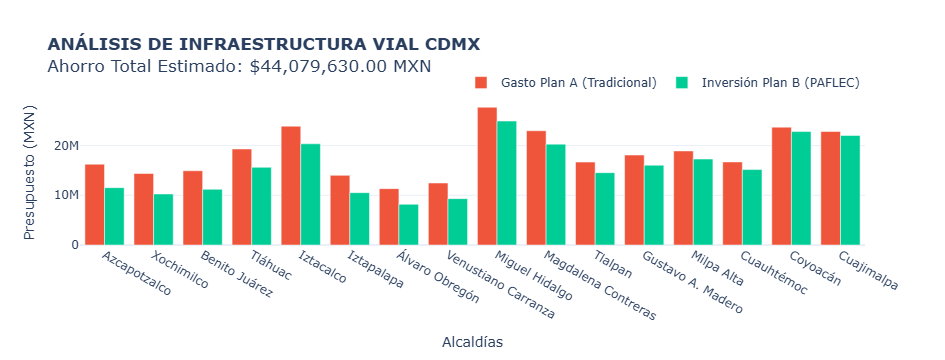

In [3]:
import plotly.graph_objects as go

# 1. PREPARACIÓN DE DATOS (Usamos el 'df' que TU código ya creó)
# Ordenamos por mayor ahorro para que el gráfico se vea impactante
df_grafico = df.sort_values('Ahorro_Potencial', ascending=False)

# 2. GENERACIÓN DEL GRÁFICO
fig = go.Figure()

# Barra Plan A (Usamos tus nombres de variable exactos)
fig.add_trace(go.Bar(
    x=df_grafico['Alcaldia'],
    y=df_grafico['Costo_Total_Plan_A'],
    name='Gasto Plan A (Tradicional)',
    marker_color='#EF553B' # Rojo
))

# Barra Plan B
fig.add_trace(go.Bar(
    x=df_grafico['Alcaldia'],
    y=df_grafico['Costo_Total_Plan_B'],
    name='Inversión Plan B (PAFLEC)',
    marker_color='#00CC96' # Verde
))

# 3. DISEÑO Y TÍTULO DINÁMICO
# Aquí está el truco: Usamos la variable 'total_ahorro' que calculó TU código
fig.update_layout(
    title=f'<b>ANÁLISIS DE INFRAESTRUCTURA VIAL CDMX</b><br>Ahorro Total Estimado: ${total_ahorro:,.2f} MXN',
    xaxis_title="Alcaldías",
    yaxis_title="Presupuesto (MXN)",
    barmode='group',
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()